In [ ]:
!pip install pymc3==3.8
# install pymc3

In [ ]:
!pip install arviz
# install arviz

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import to_datetime
import time 
import datetime 
from sklearn import preprocessing
import pymc3 as pm
import arviz as az
import scipy
## import package


In [ ]:
# read data
out1=pd.read_csv('Plant_1_Generation_Data.csv')
out2=pd.read_csv('Plant_2_Generation_Data.csv')
input1=pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
input2=pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

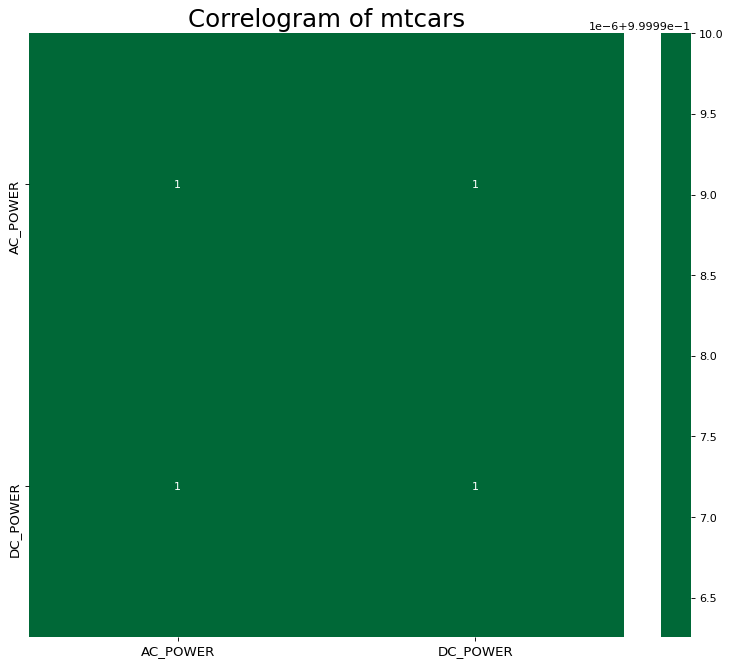

In [ ]:
# correlation
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(out1[['AC_POWER','DC_POWER']].corr(), xticklabels=out1[['AC_POWER','DC_POWER']].corr().columns, yticklabels=out1[['AC_POWER','DC_POWER']].corr().columns, cmap='RdYlGn', center=0, annot=True)
# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

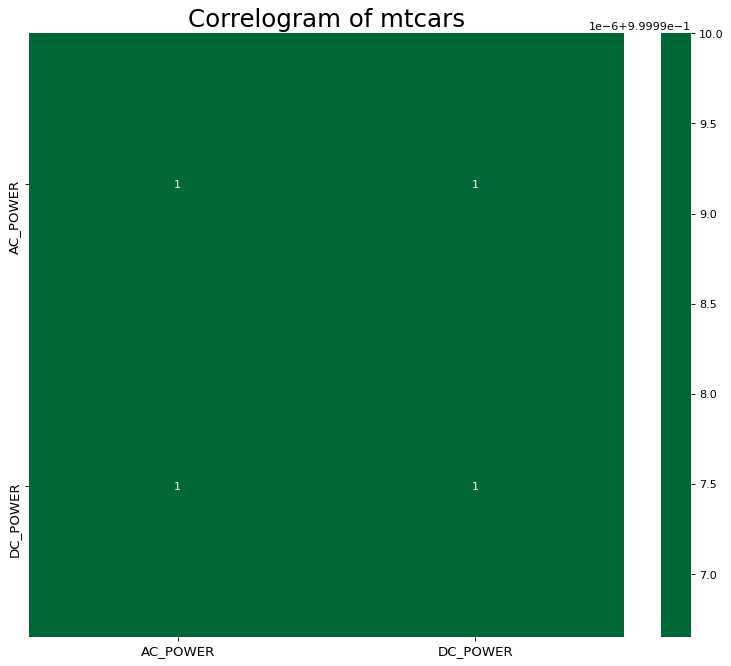

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(out2[['AC_POWER','DC_POWER']].corr(), xticklabels=out2[['AC_POWER','DC_POWER']].corr().columns, yticklabels=out2[['AC_POWER','DC_POWER']].corr().columns, cmap='RdYlGn', center=0, annot=True)
# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

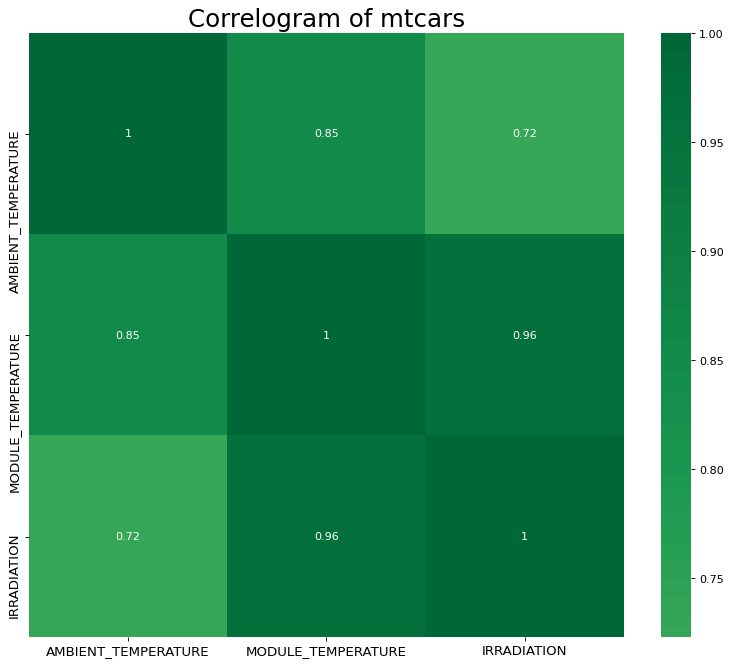

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(input1[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE', 'IRRADIATION']].corr(), xticklabels=input1[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE', 'IRRADIATION']].corr().columns, yticklabels=input1[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE', 'IRRADIATION']].corr().columns, cmap='RdYlGn', center=0, annot=True)
# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

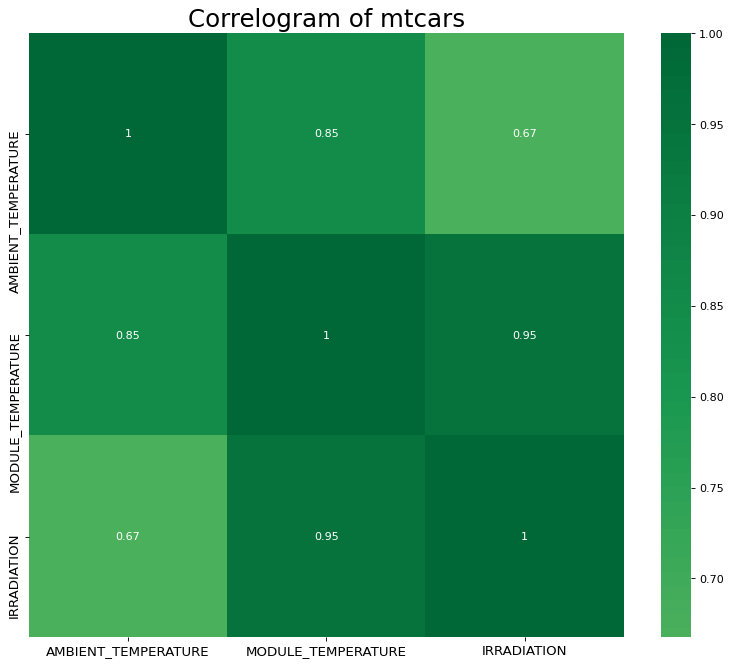

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(input2[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE', 'IRRADIATION']].corr(), xticklabels=input2[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE', 'IRRADIATION']].corr().columns, yticklabels=input2[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE', 'IRRADIATION']].corr().columns, cmap='RdYlGn', center=0, annot=True)
# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# data transform
out2['DATE_TIME'] = out2['DATE_TIME'].astype('datetime64').astype('str')
out1['DATE_TIME'] = out1['DATE_TIME'].astype('datetime64').astype('str')
# create new data column
in_df = pd.DataFrame( columns = ['Date' , 'Module_temperature','AMBIENT_TEMPERATURE', 'irradiation','sun_hour'])
out_df = pd.DataFrame( columns = ['Date' , 'DC_P', 'AC_P'])

In [ ]:
## function transform

In [ ]:
def in_trans (df,in_source):
  temp=in_source['DATE_TIME'][0][:10]
  cnt=0
  ttl_irr=0
  ttl_mt=0
  ttl_at=0
  for i in  range(len(in_source)):
    if temp==in_source['DATE_TIME'][i][:10]:
      if   in_source['IRRADIATION'][i] !=0.0:
        
        cnt=cnt+1
        ttl_irr+=in_source['IRRADIATION'][i]
        ttl_mt+=in_source['MODULE_TEMPERATURE'][i]
        ttl_at+=in_source['AMBIENT_TEMPERATURE'][i]
    else :
      
      df=df.append({'Date' : temp , 'Module_temperature' : ttl_mt/(cnt),'AMBIENT_TEMPERATURE':ttl_at/(cnt) ,'irradiation' : ttl_irr,'sun_hour':cnt/4} , ignore_index=True)
      temp=in_source['DATE_TIME'][i][:10]
      cnt=1
      ttl_at=in_source['AMBIENT_TEMPERATURE'][i]
      ttl_irr=in_source['IRRADIATION'][i]
      ttl_mt=in_source['MODULE_TEMPERATURE'][i]
  return df

In [ ]:
def in_trans2 (df,in_source):
  temp=in_source['DATE_TIME'][0][:10]
  cnt=0
  ttl_irr=0
  ttl_mt=0
  ttl_at=0
  for i in  range(len(in_source)):
    if temp==in_source['DATE_TIME'][i][:10]:
      if   in_source['IRRADIATION'][i] !=0.0:
        
        cnt=cnt+1
        ttl_irr+=in_source['IRRADIATION'][i]
        ttl_mt+=in_source['MODULE_TEMPERATURE'][i]
        ttl_at+=in_source['AMBIENT_TEMPERATURE'][i]
    else :
      
      df=df.append({'Date' : temp , 'Module_temperature' : ttl_mt,'AMBIENT_TEMPERATURE':ttl_at, 'irradiation' : ttl_irr,'sun_hour':cnt/4} , ignore_index=True)
      temp=in_source['DATE_TIME'][i][:10]
      cnt=1
      ttl_irr=in_source['IRRADIATION'][i]
      ttl_mt=in_source['MODULE_TEMPERATURE'][i]
      ttl_at=in_source['AMBIENT_TEMPERATURE'][i]
  return df

In [ ]:
def out_trans (df,ou_source):

  temp=ou_source['DATE_TIME'][0][:10]
  
  ttl_ac=0
  ttl_dc=0
  for i in  range(len(ou_source)):
    if temp==ou_source['DATE_TIME'][i][:10]:
      if   ou_source['DC_POWER'][i] !=0.0:
              
        ttl_ac+=ou_source['AC_POWER'][i]
        ttl_dc+=ou_source['DC_POWER'][i]
    else :
      
      df=df.append({'Date' : temp , 'DC_P' : ttl_dc, 'AC_P' : ttl_ac} , ignore_index=True)
      temp=ou_source['DATE_TIME'][i][:10]
      
      ttl_ac=ou_source['AC_POWER'][i]
      ttl_dc=ou_source['DC_POWER'][i]
  return df

In [ ]:
in_ok1=in_trans(in_df,input1) # plant1 temperature (avg)
in_ok2=in_trans(in_df,input2) # plant2 temperature (avg)
in_ok3=in_trans2(in_df,input1) # plant1 temperature (acummulation)
in_ok4=in_trans2(in_df,input2) # plant2 temperature (acummulation)
ou_ok1=out_trans(out_df,out1) # plant1 out
ou_ok2=out_trans(out_df,out2) # plant2 out

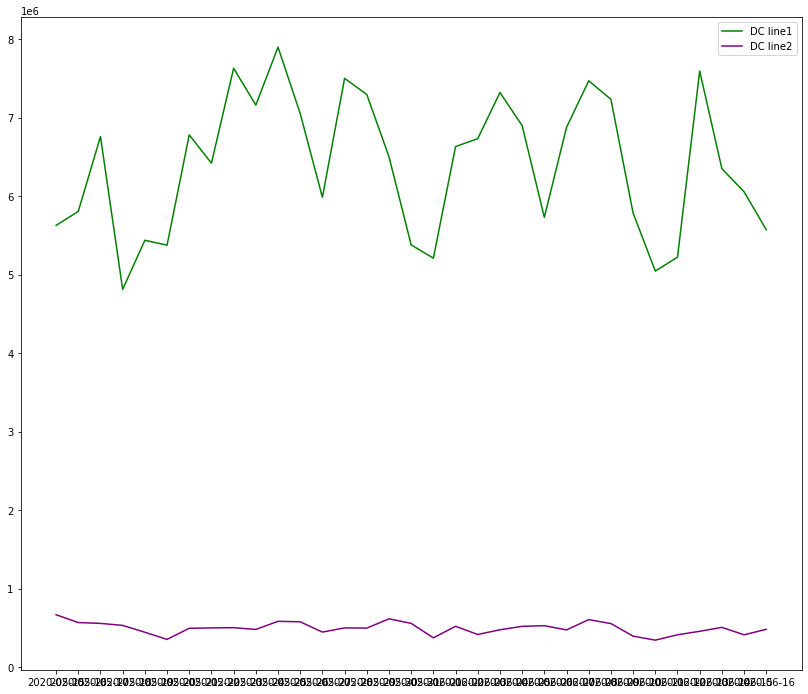

In [ ]:
import matplotlib.pyplot as plt 
fig, ax1 = plt.subplots() # 使用subplots()建立視窗
ax1.plot(in_ok1.Date, ou_ok1.DC_P,linestyle='-',label='DC line1',color='green')
ax1.plot(in_ok1.Date, ou_ok2.DC_P,linestyle='-',label='DC line2',color='purple')
plt.gcf().set_size_inches(14, 12)
plt.legend()
plt.show()

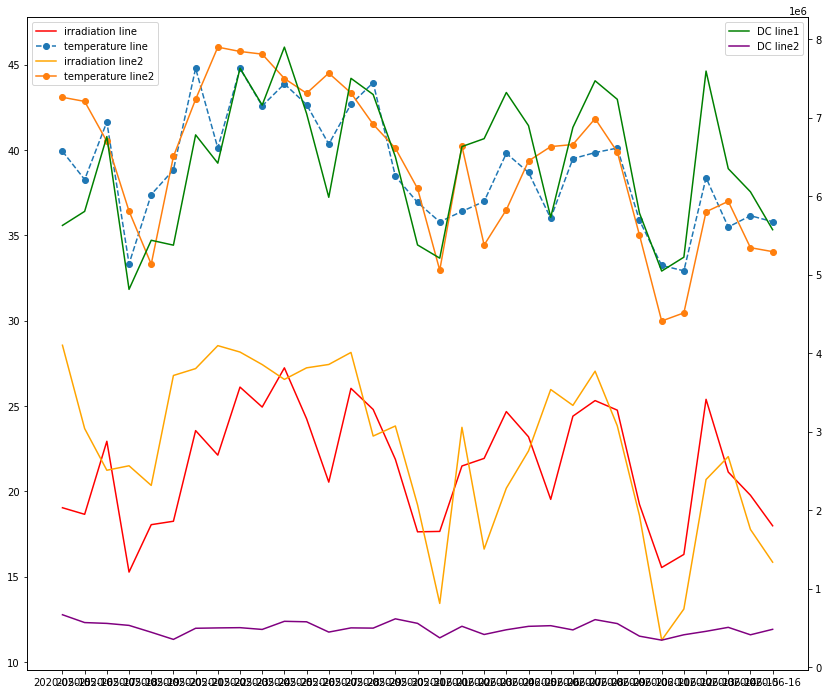

In [ ]:
import matplotlib.pyplot as plt 
fig, ax1 = plt.subplots() # 使用subplots()建立視窗


ax1.plot(in_ok1.Date, in_ok1.irradiation,label='irradiation line',linestyle ='solid',color='red')
ax1.plot_date(in_ok1.Date, in_ok1.Module_temperature,linestyle='--',label='temperature line')
ax1.plot(in_ok1.Date, in_ok2.irradiation,label='irradiation line2',linestyle ='solid',color='orange')
ax1.plot_date(in_ok1.Date, in_ok2.Module_temperature,linestyle='solid',label='temperature line2')
#ax1.plot_date(in_ok1.Date, in_ok1.sun_hour,linestyle='--',label='sun_hour',color='purple')
#ax1.plot(in_ok3.Date, in_ok1.irradiation,label='irradiation line2',linestyle ='solid',color='red')
#ax1.plot_date(in_ok3.Date, in_ok1.Module_temperature,linestyle='--',label='temperature line2')

plt.legend(loc='upper left')
ax2 = ax1.twinx() # 建立第二個座標軸
ax2.plot(in_ok1.Date, ou_ok1.DC_P,linestyle='-',label='DC line1',color='green')
ax2.plot(in_ok1.Date, ou_ok2.DC_P,linestyle='-',label='DC line2',color='purple')
plt.gcf().set_size_inches(14, 12)
plt.legend()
plt.show()

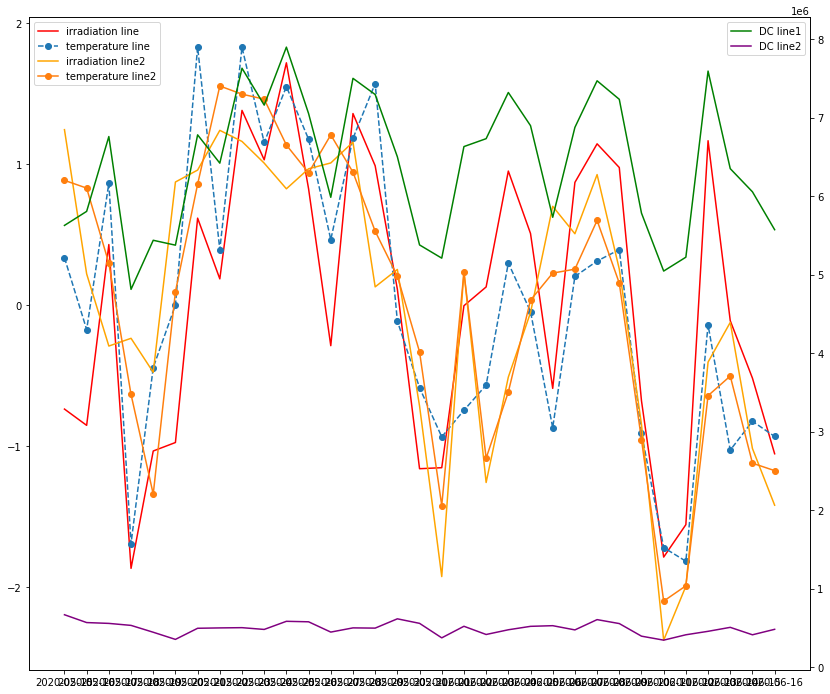

In [ ]:
import matplotlib.pyplot as plt 
fig, ax1 = plt.subplots() # 使用subplots()建立視窗


ax1.plot(in_ok1.Date, preprocessing.scale(in_ok1.irradiation),label='irradiation line',linestyle ='solid',color='red')
ax1.plot_date(in_ok1.Date, preprocessing.scale(in_ok1.Module_temperature),linestyle='--',label='temperature line')
ax1.plot(in_ok1.Date, preprocessing.scale(in_ok2.irradiation),label='irradiation line2',linestyle ='solid',color='orange')
ax1.plot_date(in_ok1.Date, preprocessing.scale(in_ok2.Module_temperature),linestyle='solid',label='temperature line2')
#ax1.plot_date(in_ok1.Date, in_ok1.sun_hour,linestyle='--',label='sun_hour',color='purple')
#ax1.plot(in_ok3.Date, in_ok1.irradiation,label='irradiation line2',linestyle ='solid',color='red')
#ax1.plot_date(in_ok3.Date, in_ok1.Module_temperature,linestyle='--',label='temperature line2')

plt.legend(loc='upper left')
ax2 = ax1.twinx() # 建立第二個座標軸
ax2.plot(in_ok1.Date, ou_ok1.DC_P,linestyle='-',label='DC line1',color='green')
ax2.plot(in_ok1.Date, ou_ok2.DC_P,linestyle='-',label='DC line2',color='purple')
plt.gcf().set_size_inches(14, 12)
plt.legend()
plt.show()

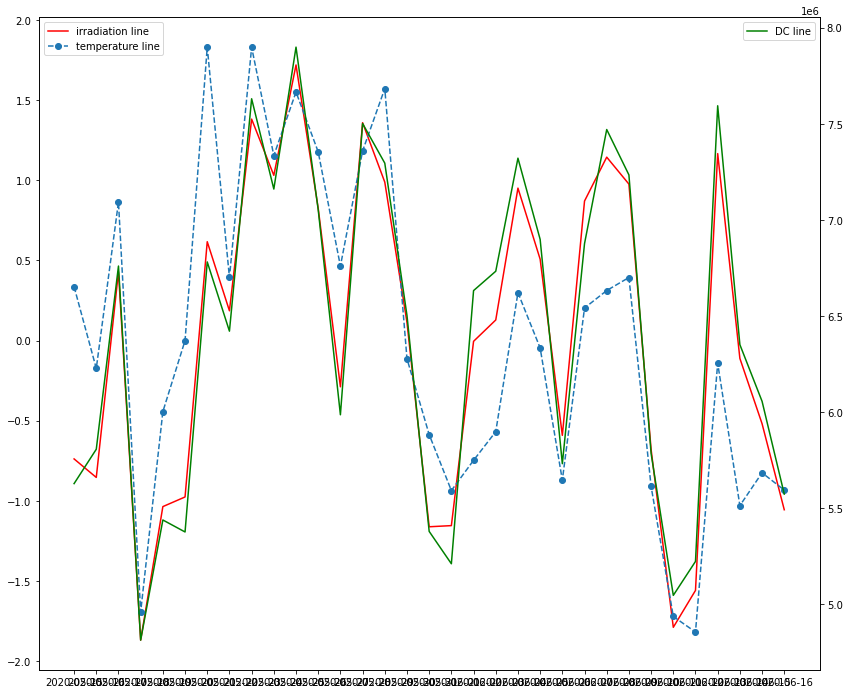

In [ ]:
import matplotlib.pyplot as plt 
fig, ax1 = plt.subplots() # 使用subplots()建立視窗


ax1.plot(in_ok1.Date, preprocessing.scale(in_ok1.irradiation),label='irradiation line',linestyle ='solid',color='red')
ax1.plot_date(in_ok1.Date, preprocessing.scale(in_ok1.Module_temperature),linestyle='--',label='temperature line')
#ax1.plot_date(in_ok1.Date, in_ok1.sun_hour,linestyle='--',label='sun_hour',color='purple')
#ax1.plot(in_ok3.Date, in_ok1.irradiation,label='irradiation line2',linestyle ='solid',color='red')
#ax1.plot_date(in_ok3.Date, in_ok1.Module_temperature,linestyle='--',label='temperature line2')

plt.legend(loc='upper left')
ax2 = ax1.twinx() # 建立第二個座標軸
ax2.plot(in_ok1.Date, ou_ok1.DC_P,linestyle='-',label='DC line',color='green')
plt.gcf().set_size_inches(14, 12)
plt.legend()
plt.show()

In [ ]:
from theano import shared 
# 共用參數

In [ ]:
x_8 = preprocessing.scale(in_ok2.Module_temperature)
 
x_shared8 = shared(x_8) 
y_8 = ou_ok2.AC_P

In [ ]:
with pm.Model() as model_t: # student t model 模組溫度 vs ac_p plant2
  α = pm.Normal('α', mu=y_8.mean(), sd=y_8.std())
  β = pm.Normal('β', mu=0, sd=y_8.std()) 
  ε = pm.HalfNormal('ε', 5)
  ν_ = pm.Exponential('ν_', 1/29)
  ν = pm.Deterministic('ν', ν_ + 1)
  y_pred8 = pm.StudentT('y_pred', mu=α + β * x_shared8, sd=ε, nu=ν, observed=y_8)
  trace_8 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ν_, ε, β, α]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:21<00:00, 113.86it/s]
The acceptance probability does not match the target. It is 0.9574738880307476, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9409230762290859, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 200/200 [00:02<00:00, 85.37it/s]
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
posterior predictive variable y_pred's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


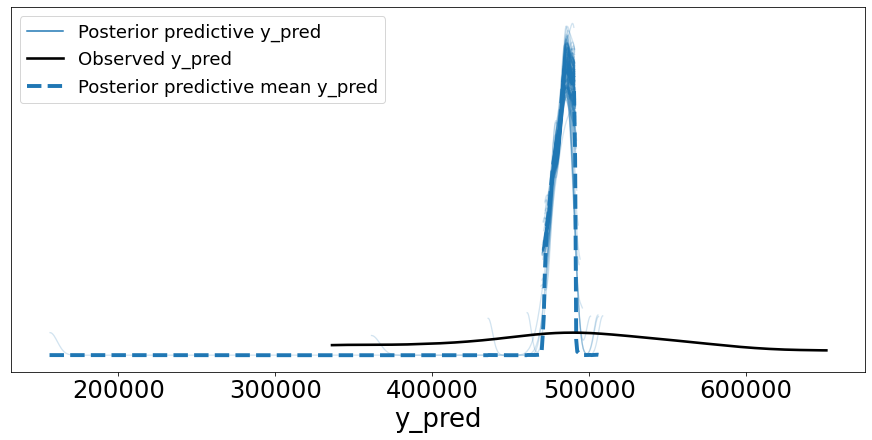

In [ ]:
ppc8 = pm.sample_posterior_predictive(trace_8, samples=200, model=model_t,random_seed=2)
data_ppc8 = az.from_pymc3(trace=trace_8, posterior_predictive=ppc8)
ax = az.plot_ppc(data_ppc8, figsize=(12, 6), mean=True) 
plt.show()

In [ ]:
x_3 = preprocessing.scale(in_ok1.Module_temperature)
 
x_shared3 = shared(x_3) 
y_3 = ou_ok1.AC_P

In [ ]:
with pm.Model() as model_t: # student t model 模組溫度 vs ac_p plant1
  α = pm.Normal('α', mu=y_3.mean(), sd=y_3.std())
  β = pm.Normal('β', mu=0, sd=y_3.std()) 
  ε = pm.HalfNormal('ε', 5)
  ν_ = pm.Exponential('ν_', 1/29)
  ν = pm.Deterministic('ν', ν_ + 1)
  y_pred = pm.StudentT('y_pred', mu=α + β * x_shared3, sd=ε, nu=ν, observed=y_3)
  trace_1 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ν_, ε, β, α]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:23<00:00, 106.29it/s]
The acceptance probability does not match the target. It is 0.9125917389595453, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 200/200 [00:00<00:00, 599.01it/s]
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
posterior predictive variable y_pred's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


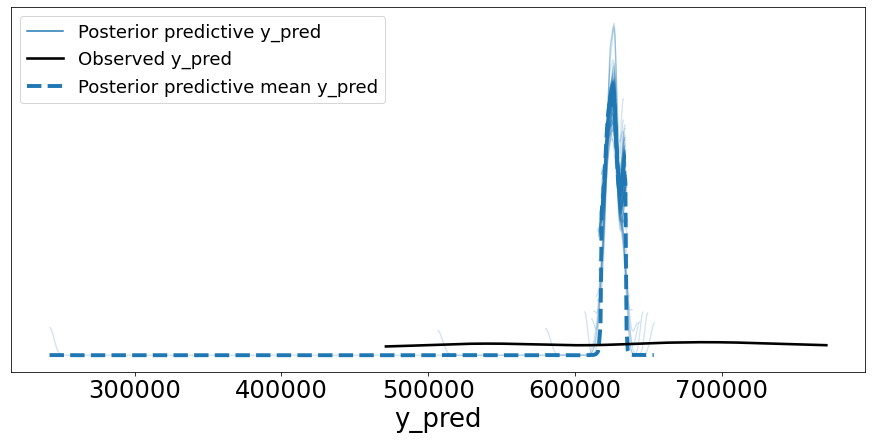

In [ ]:
ppc1 = pm.sample_posterior_predictive(trace_1, samples=200, model=model_t,random_seed=2)
data_ppc1 = az.from_pymc3(trace=trace_1, posterior_predictive=ppc1)
ax = az.plot_ppc(data_ppc1, figsize=(12, 6), mean=True) 
plt.show()

In [ ]:
x_7 = preprocessing.scale(in_ok2.irradiation) # student t model 輻射 vs ac_p plant2
x_shared7 = shared(x_7) 
y_7 = ou_ok2.AC_P

In [ ]:
with pm.Model() as model_t:
  α = pm.Normal('α', mu=y_7.mean(), sd=y_7.std())
  β = pm.Normal('β', mu=0, sd=y_7.std()) 
  ε = pm.HalfNormal('ε', 5)
  ν_ = pm.Exponential('ν_', 1/29)
  ν = pm.Deterministic('ν', ν_ + 1)
  y_pred7 = pm.StudentT('y_pred', mu=α + β * x_shared7, sd=ε, nu=ν, observed=y_7)
  trace_7 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ν_, ε, β, α]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:15<00:00, 162.24it/s]
The acceptance probability does not match the target. It is 0.3674575228570285, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.6073851262568027, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 200/200 [00:00<00:00, 360.73it/s]
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
posterior predictive variable y_pred's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


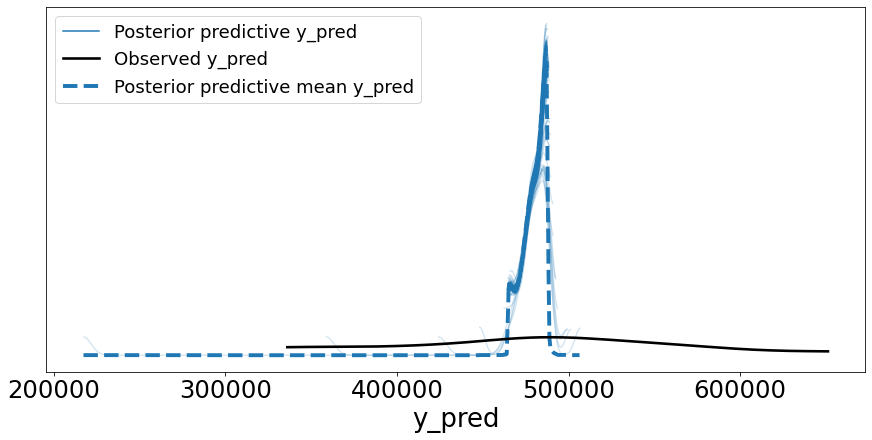

In [ ]:
ppc7 = pm.sample_posterior_predictive(trace_7, samples=200, model=model_t,random_seed=2)
data_ppc7 = az.from_pymc3(trace=trace_7, posterior_predictive=ppc7)
ax = az.plot_ppc(data_ppc7, figsize=(12, 6), mean=True) 
plt.show()

In [ ]:
x_4 = preprocessing.scale(in_ok3.irradiation) 
x_shared4 = shared(x_4) 
y_4 = ou_ok1.AC_P

In [ ]:
with pm.Model() as model_t:  # student t model 輻射 vs ac_p plant1
  α = pm.Normal('α', mu=y_4.mean(), sd=y_4.std())
  β = pm.Normal('β', mu=0, sd=y_4.std()) 
  ε = pm.HalfNormal('ε', 5)
  ν_ = pm.Exponential('ν_', 1/29)
  ν = pm.Deterministic('ν', ν_ + 1)
  y_pred2 = pm.StudentT('y_pred', mu=α + β * x_shared4, sd=ε, nu=ν, observed=y_4)
  trace_2 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ν_, ε, β, α]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:19<00:00, 130.09it/s]
The acceptance probability does not match the target. It is 0.9788084665543919, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9828611941663363, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


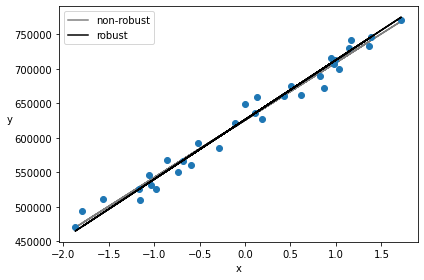

In [ ]:
beta_c, alpha_c = scipy.stats.linregress(x_4, y_4)[:2]
plt.plot(x_4, (alpha_c + beta_c * x_4), 'k', label='non-robust', alpha=0.5)
plt.plot(x_4, y_4,'C0o')
alpha_m = trace_2['α'].mean()
beta_m = trace_2['β'].mean()
plt.plot(x_4, alpha_m + beta_m * x_4, c='k', label='robust')
plt.xlabel('x')
plt.ylabel('y', rotation=0) 
plt.legend(loc=2)
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 200/200 [00:00<00:00, 605.97it/s]
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
posterior predictive variable y_pred's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


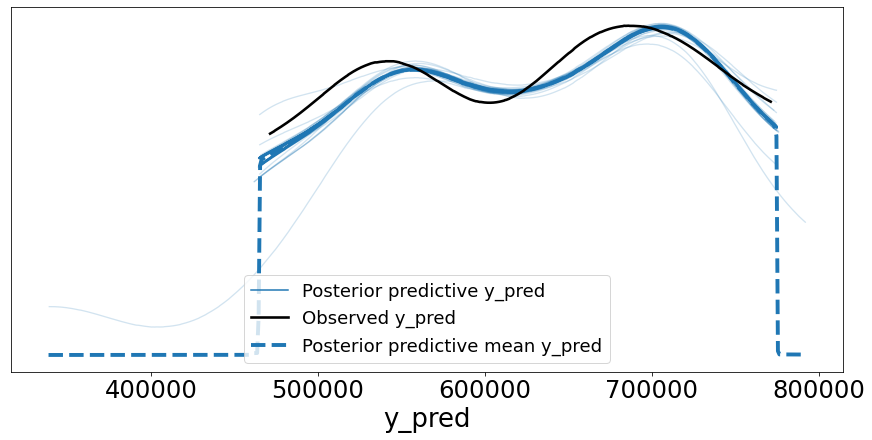

In [ ]:
ppc2 = pm.sample_posterior_predictive(trace_2, samples=200, model=model_t,random_seed=2)
data_ppc2 = az.from_pymc3(trace=trace_2, posterior_predictive=ppc2)
ax = az.plot_ppc(data_ppc2, figsize=(12, 6), mean=True) 
plt.show()

In [ ]:
x_5=np.concatenate((in_ok1.Module_temperature,in_ok2.Module_temperature), axis=0)
y_5=np.concatenate((in_ok1.irradiation,in_ok2.irradiation), axis=0)

In [ ]:
x_5 = preprocessing.scale(x_5)
x_shared5 = shared(x_5) 
#y_5 = in_ok3.irradiation

In [ ]:
with pm.Model() as model_poly: # poly model 模組溫度 vs 輻射 plant2+plant1
  α = pm.Normal('α', mu=y_5.mean(), sd=y_5.std())
  β1 = pm.Normal('β1', mu=0, sd=1) 
  β2 = pm.Normal('β2', mu=0, sd=1)
  ε = pm.HalfCauchy('ε', 5)
  mu = α + β1 * x_shared5 + β2 * x_shared5**2 
  y_pred3 = pm.Normal('y_pred', mu=mu, sd=ε, observed=y_5)
  trace_poly = pm.sample(2000) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ε, β2, β1, α]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:02<00:00, 913.88it/s]


/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 200/200 [00:01<00:00, 175.14it/s]
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
posterior predictive variable y_pred's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


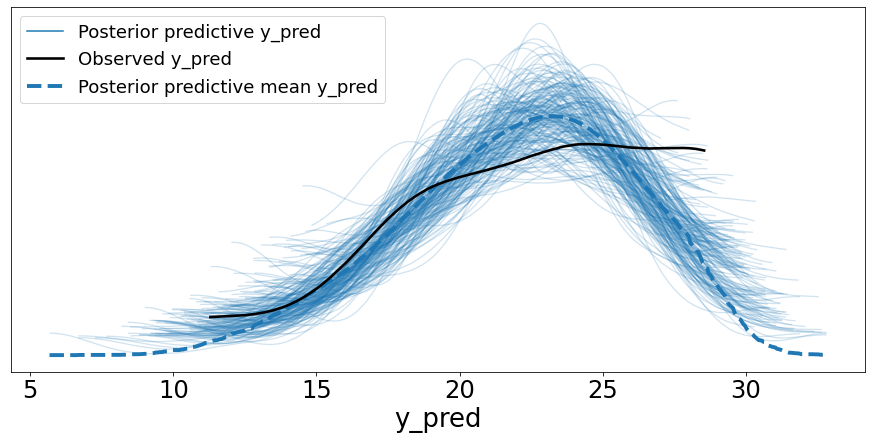

In [ ]:
ppc3 = pm.sample_posterior_predictive(trace_poly, samples=200, model=model_poly,random_seed=2)
data_ppc3 = az.from_pymc3(trace=trace_poly, posterior_predictive=ppc3)
ax = az.plot_ppc(data_ppc3, figsize=(12, 6), mean=True) 
plt.show()

In [ ]:
with pm.Model() as model_g: # linear model 模組溫度 vs 輻射 plant2+plant1
    α = pm.Normal('α', mu=y_5.mean(), sd=1)
    β = pm.Normal('β', mu=0, sd=1) 
    ε = pm.HalfNormal('ε', 5)
    y_pred4 = pm.Normal('y_pred', mu= α + β * x_shared5, sd=ε, observed=y_5) 

    trace_g = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ε, β, α]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:01<00:00, 1437.96it/s]


/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 200/200 [00:00<00:00, 595.16it/s]
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
posterior predictive variable y_pred's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


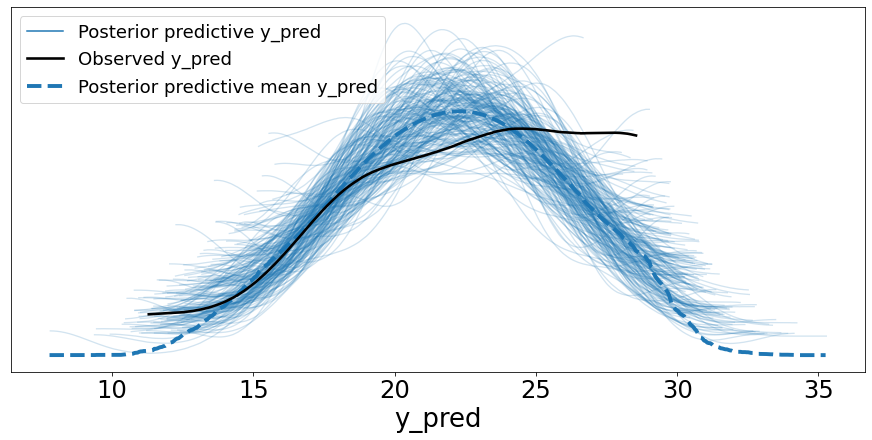

In [ ]:
ppc4 = pm.sample_posterior_predictive(trace_g, samples=200, model=model_g,random_seed=2)
data_ppc4 = az.from_pymc3(trace=trace_g, posterior_predictive=ppc4)
ax = az.plot_ppc(data_ppc4, figsize=(12, 6), mean=True) 
plt.show()

In [ ]:
  with pm.Model() as model_t:  # student model 模組溫度 vs 輻射 plant2+plant1
    α = pm.Normal('α', mu=y_5.mean(), sd=y_5.std())
    β = pm.Normal('β', mu=0, sd=y_5.std()) 
    ε = pm.HalfNormal('ε', 5)
    ν_ = pm.Exponential('ν_', 1/29)
    ν = pm.Deterministic('ν', ν_ + 1)
    y_pred5 = pm.StudentT('y_pred', mu=α + β * x_shared5, sd=ε, nu=ν, observed=y_5)
    trace_5 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ν_, ε, β, α]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:02<00:00, 1040.49it/s]


/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 200/200 [00:00<00:00, 663.27it/s]
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
posterior predictive variable y_pred's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


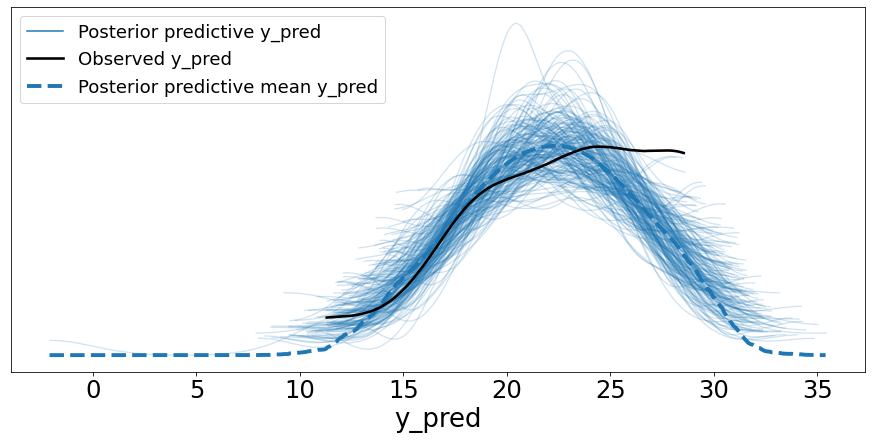

In [ ]:

ppc5 = pm.sample_posterior_predictive(trace_5, samples=200, model=model_t,random_seed=2)
data_ppc5 = az.from_pymc3(trace=trace_5, posterior_predictive=ppc5)
ax = az.plot_ppc(data_ppc5, figsize=(12, 6), mean=True) 
plt.show()

In [ ]:
x_6=np.concatenate((in_ok1.AMBIENT_TEMPERATURE,in_ok2.AMBIENT_TEMPERATURE), axis=0)
y_6=np.concatenate((in_ok1.Module_temperature,in_ok2.Module_temperature), axis=0)

In [ ]:
x_6 = preprocessing.scale(x_6)
x_shared6 = shared(x_6) 


In [ ]:
  with pm.Model() as model_t:  # student model 環境溫度 vs 模組溫度 plant2+plant1
    α = pm.Normal('α', mu=y_6.mean(), sd=y_6.std())
    β = pm.Normal('β', mu=0, sd=y_6.std() )
    ε = pm.HalfNormal('ε', 5)
    ν_ = pm.Exponential('ν_', 1/29)
    ν = pm.Deterministic('ν', ν_ + 1)
    y_pred6 = pm.StudentT('y_pred', mu=α + β * x_shared6, sd=ε, nu=ν, observed=y_6)
    trace_6 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ν_, ε, β, α]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:02<00:00, 870.59it/s]


/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 200/200 [00:00<00:00, 572.95it/s]
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
posterior predictive variable y_pred's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


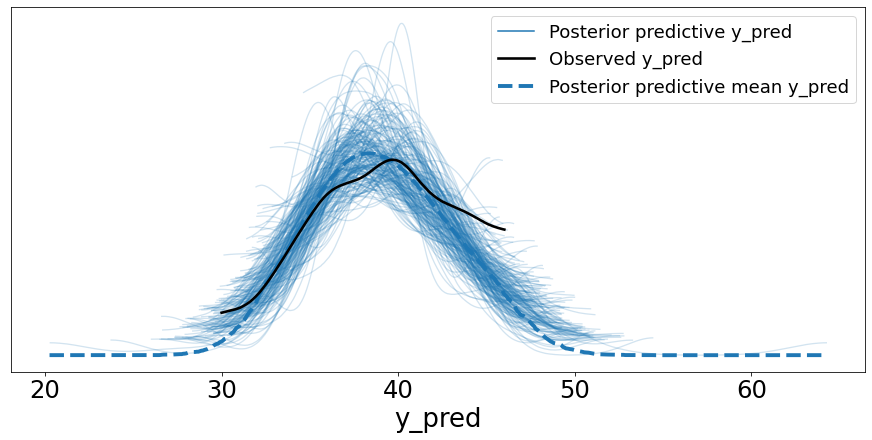

In [ ]:
ppc6 = pm.sample_posterior_predictive(trace_6, samples=200, model=model_t,random_seed=2)
data_ppc6 = az.from_pymc3(trace=trace_6, posterior_predictive=ppc6)
ax = az.plot_ppc(data_ppc6, figsize=(12, 6), mean=True) 
plt.show()

In [ ]:
in_ok1.AMBIENT_TEMPERATURE

0     29.820316
1     28.434623
2     29.394027
3     25.068804
4     27.307883
5     26.932531
6     29.252757
7     28.401432
8     29.209193
9     29.681745
10    29.642159
11    29.307058
12    29.231614
13    29.481282
14    27.922546
15    26.667565
16    26.895938
17    26.473725
18    25.807198
19    26.201522
20    27.092640
21    26.523987
22    26.036787
23    26.663450
24    27.303560
25    27.769728
26    26.502370
27    25.764286
28    25.375869
29    26.277407
30    25.443664
31    26.415533
32    26.389841
Name: AMBIENT_TEMPERATURE, dtype: float64

In [ ]:
in_ok2.AMBIENT_TEMPERATURE

0     32.825157
1     31.680288
2     31.787615
3     28.617979
4     27.311937
5     29.861966
6     31.347186
7     31.893440
8     33.224999
9     33.331772
10    32.756527
11    32.138251
12    32.354339
13    32.078018
14    31.769996
15    31.485632
16    29.705806
17    26.928882
18    29.100360
19    27.642359
20    27.856808
21    28.976056
22    30.075409
23    29.691115
24    30.594253
25    30.279302
26    28.796701
27    26.469391
28    25.733418
29    28.043813
30    28.727603
31    27.898171
32    27.906082
Name: AMBIENT_TEMPERATURE, dtype: float64

In [ ]:
# 移動平均計算後三天溫度

In [ ]:
plant1_day1=(in_ok1.AMBIENT_TEMPERATURE.iloc[30]+in_ok1.AMBIENT_TEMPERATURE.iloc[31]+in_ok1.AMBIENT_TEMPERATURE.iloc[32])/3
plant2_day1=(in_ok2.AMBIENT_TEMPERATURE.iloc[30]+in_ok2.AMBIENT_TEMPERATURE.iloc[31]+in_ok2.AMBIENT_TEMPERATURE.iloc[32])/3

In [ ]:
plant1_day2=(plant1_day1+in_ok1.AMBIENT_TEMPERATURE.iloc[31]+in_ok1.AMBIENT_TEMPERATURE.iloc[32])/3
plant2_day2=(plant2_day1+in_ok2.AMBIENT_TEMPERATURE.iloc[31]+in_ok2.AMBIENT_TEMPERATURE.iloc[32])/3

In [ ]:
plant1_day3=(plant1_day1+plant1_day2+in_ok1.AMBIENT_TEMPERATURE.iloc[32])/3
plant2_day3=(plant2_day1+plant2_day2+in_ok2.AMBIENT_TEMPERATURE.iloc[32])/3

In [ ]:
[plant1_day1,plant1_day2,plant1_day3,plant2_day1,plant2_day2,plant2_day3]

[26.08301265137192,
 26.29612901940712,
 26.25632762853128,
 28.17728553641489,
 27.993846368288345,
 28.025738094246254]

In [ ]:
#合併資料
ch=np.concatenate((in_ok1.AMBIENT_TEMPERATURE,in_ok2.AMBIENT_TEMPERATURE), axis=0)

In [ ]:
#合併資料
ch=np.concatenate((ch,[plant1_day1,plant1_day2,plant1_day3,plant2_day1,plant2_day2,plant2_day3]),axis=0)

In [ ]:
#正規畫
chscaler = preprocessing.scale(ch)

In [ ]:
chscaler

array([ 0.57811848, -0.05818479,  0.38236905, -1.60375267, -0.57557823,
       -0.74793808,  0.31749825, -0.07342606,  0.29749388,  0.51448769,
        0.49630989,  0.34243287,  0.30778947,  0.42243594, -0.29332802,
       -0.86960918, -0.76474176, -0.95861996, -1.26468555, -1.08361385,
       -0.67441696, -0.93553984, -1.15925968, -0.87149904, -0.57756365,
       -0.36350161, -0.94546594, -1.28439064, -1.46275005, -1.04876796,
       -1.431619  , -0.98534115, -0.99713878,  1.95792726,  1.4322088 ,
        1.48149304,  0.02601112, -0.57371675,  0.59724421,  1.27924991,
        1.53008742,  2.14153282,  2.19056212,  1.92641272,  1.64250343,
        1.74172991,  1.61484452,  1.47340247,  1.34282392,  0.52553607,
       -0.74961367,  0.24751836, -0.42198866, -0.32351471,  0.19043847,
        0.69525604,  0.51879009,  0.93350701,  0.78888303,  0.1080795 ,
       -0.96060974, -1.2985651 , -0.23764313,  0.07635017, -0.30452093,
       -0.30088815, -1.13803297, -1.04017097, -1.05844757, -0.17

In [ ]:
#使用共享資料 重新setdata
# 參考資料http://hk.uwenku.com/question/p-xjrdeljf-bmz.html
x_shared6.set_value(chscaler) 

In [ ]:
# 重新sample
new_ppc6 = pm.sample_posterior_predictive(trace_6, samples=200, model=model_t,random_seed=2)
#new_ppc6 = pm.sample_ppc(trace_6, samples=200, model=model_t) 

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 200/200 [00:00<00:00, 318.06it/s]


In [ ]:
sample = new_ppc6['y_pred'][-1]

In [ ]:
# 尾巴6筆資料是新放的 取mean 值 代入下一層model
print(pm.stats.hpd(new_ppc6['y_pred'][-1]).mean())
print(pm.stats.hpd(new_ppc6['y_pred'][-2]).mean())
print(pm.stats.hpd(new_ppc6['y_pred'][-3]).mean())
print(pm.stats.hpd(new_ppc6['y_pred'][-4]).mean())
print(pm.stats.hpd(new_ppc6['y_pred'][-5]).mean())
print(pm.stats.hpd(new_ppc6['y_pred'][-6]).mean())     

39.48468128531993
39.16799955378183
39.05823790929267
39.132361255719616
38.470172035588355
38.335601067733506


/usr/local/lib/python3.6/dist-packages/arviz/stats/stats.py:341: UserWarning: hpd will be deprecated Please replace hdi
  ("hpd will be deprecated " "Please replace hdi"),


In [ ]:
# 合併第二層 data
step2=[pm.stats.hpd(new_ppc6['y_pred'][-6]).mean(),pm.stats.hpd(new_ppc6['y_pred'][-5]).mean(),pm.stats.hpd(new_ppc6['y_pred'][-4]).mean(),pm.stats.hpd(new_ppc6['y_pred'][-3]).mean(),pm.stats.hpd(new_ppc6['y_pred'][-2]).mean(),pm.stats.hpd(new_ppc6['y_pred'][-1]).mean()]

/usr/local/lib/python3.6/dist-packages/arviz/stats/stats.py:341: UserWarning: hpd will be deprecated Please replace hdi
  ("hpd will be deprecated " "Please replace hdi"),


In [ ]:
# 合併第二層 data
st_temp2=np.concatenate((in_ok1.Module_temperature,in_ok2.Module_temperature), axis=0)

In [ ]:
# 合併第二層 data
st2_new=np.concatenate((st_temp2,step2), axis=0)

In [ ]:
#  標準化
st2caler = preprocessing.scale(st2_new)

In [ ]:
# 重新設定 共享資料
x_shared5.set_value(st2caler) 

In [ ]:
# 重新抽樣
new_ppc3 = pm.sample_posterior_predictive(trace_poly, samples=200, model=model_poly,random_seed=2)

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 200/200 [00:00<00:00, 348.19it/s]


In [ ]:
# 取尾巴6筆資料平均值
print(pm.stats.hpd(new_ppc3['y_pred'][-1]).mean())
print(pm.stats.hpd(new_ppc3['y_pred'][-2]).mean())
print(pm.stats.hpd(new_ppc3['y_pred'][-3]).mean())
print(pm.stats.hpd(new_ppc3['y_pred'][-4]).mean())
print(pm.stats.hpd(new_ppc3['y_pred'][-5]).mean())
print(pm.stats.hpd(new_ppc3['y_pred'][-6]).mean())     

21.527186806824318
20.477843384953054
21.933095187055606
21.1104949181654
22.39473602175655
21.001114530688664


/usr/local/lib/python3.6/dist-packages/arviz/stats/stats.py:341: UserWarning: hpd will be deprecated Please replace hdi
  ("hpd will be deprecated " "Please replace hdi"),


In [ ]:
# 合併最後一層資料
step3=[pm.stats.hpd(new_ppc3['y_pred'][-6]).mean(),pm.stats.hpd(new_ppc3['y_pred'][-5]).mean(),pm.stats.hpd(new_ppc3['y_pred'][-4]).mean(),pm.stats.hpd(new_ppc3['y_pred'][-3]).mean(),pm.stats.hpd(new_ppc3['y_pred'][-2]).mean(),pm.stats.hpd(new_ppc3['y_pred'][-1]).mean()]

/usr/local/lib/python3.6/dist-packages/arviz/stats/stats.py:341: UserWarning: hpd will be deprecated Please replace hdi
  ("hpd will be deprecated " "Please replace hdi"),


In [ ]:
# 合併最後一層資料
st3_new=np.concatenate((in_ok1.irradiation,step3), axis=0)

In [ ]:
# 標準化
st3caler = preprocessing.scale(st3_new)

In [ ]:
# 重新設定資料集
x_shared4.set_value(st3caler) 

In [ ]:
# 抽樣
new_ppc2 = pm.sample_posterior_predictive(trace_2, samples=200, model=model_t,random_seed=2)

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 200/200 [00:00<00:00, 336.57it/s]


In [ ]:
print(pm.stats.hpd(new_ppc2['y_pred'][-1]).mean())
print(pm.stats.hpd(new_ppc2['y_pred'][-2]).mean())
print(pm.stats.hpd(new_ppc2['y_pred'][-3]).mean())
print(pm.stats.hpd(new_ppc2['y_pred'][-4]).mean())
print(pm.stats.hpd(new_ppc2['y_pred'][-5]).mean())
print(pm.stats.hpd(new_ppc2['y_pred'][-6]).mean())     

632593.7182428767
632346.1698646786
632278.3489703925
632265.9737783831
632434.0365996587
632310.2264536134


/usr/local/lib/python3.6/dist-packages/arviz/stats/stats.py:341: UserWarning: hpd will be deprecated Please replace hdi
  ("hpd will be deprecated " "Please replace hdi"),


In [ ]:
print(pm.stats.hpd(new_ppc2['y_pred'][-1]))
print(pm.stats.hpd(new_ppc2['y_pred'][-2]))
print(pm.stats.hpd(new_ppc2['y_pred'][-3]))
print(pm.stats.hpd(new_ppc2['y_pred'][-4]))
print(pm.stats.hpd(new_ppc2['y_pred'][-5]))
print(pm.stats.hpd(new_ppc2['y_pred'][-6]))     

[487555.55179244 777631.88469331]
[487536.12591925 777156.21381011]
[488343.37776249 776213.3201783 ]
[488464.83524174 776067.11231502]
[488754.70812942 776113.3650699 ]
[488497.0585604  776123.39434683]


/usr/local/lib/python3.6/dist-packages/arviz/stats/stats.py:341: UserWarning: hpd will be deprecated Please replace hdi
  ("hpd will be deprecated " "Please replace hdi"),


In [ ]:
molde
waic_1=az.waic(trace_5)
waic_p=az.waic(trace_poly)
waic_g=az.waic(trace_g)

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


ValueError: ignored

In [ ]:
waic_p

NameError: ignored

In [ ]:
#model 比較
cmp_df = az.compare({'model_t':trace_5, 'model_p':trace_poly,'model_g':trace_g}, method='BB-pseudo-BMA')

In [ ]:
#print
cmp_df

In [ ]:
in_ok1